In [15]:
import json
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('/workspace/CS762_Project/e5-large-v2')

with open('/workspace/CS762_Project/Data_files/filtered_combined_with_seed_data_Dec8.json', 'r') as json_file:
    data = json.load(json_file)
data_mod = []
for k,v in data.items():
    data_mod.extend(v)
data = data_mod
questions = [i['question'] for i in data]
embeddings = model.encode(questions)
labels = ['' for i in data]

In [16]:
len(data)

243

In [17]:
questions = [i['question'] for i in data]
embeddings = model.encode(questions)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of Squared Errors (SSE): 43.57402801513672


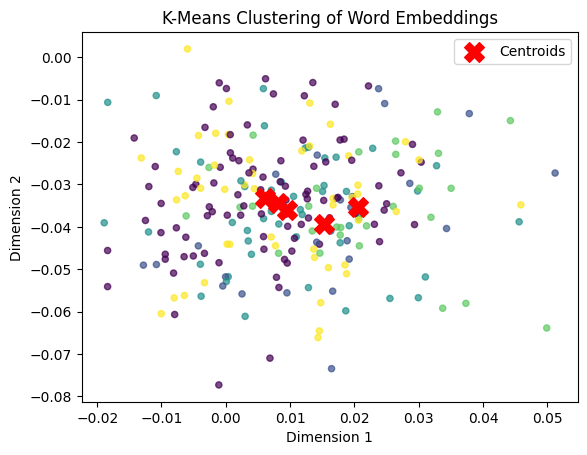

In [18]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)
cluster_centers = kmeans.cluster_centers_

# Calculate the Sum of Squared Errors (SSE)
sse = np.sum((embeddings - cluster_centers[cluster_labels]) ** 2)

# Print the SSE
print(f"Sum of Squared Errors (SSE): {sse}")

# Plotting (for illustration, adjust as needed for 1024-dimensional embeddings)
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [19]:
cluster_dict = {}
for idx,i in enumerate(cluster_labels):
    if i not in cluster_dict:
        cluster_dict[i] = []
    cluster_dict[i].append(questions[idx])

In [20]:
cluster_dict[1]

['You are given an array of n-element. You have to make subsets from the array such that no subset contain duplicate elements. Find out minimum number of subset possible.',
 "Implement a stack that supports push, pop, top, and retrieving the minimum element in constant time.\n\n- push(x) -- Push element x onto stack.\n- pop() -- Removes the element on top of the stack.\n- top() -- Get the top element.\n- getMin() -- Retrieve the minimum element in the stack.\n\nYou may assume the stack's top element is not the minimum element initially.",
 'Trapping Rain Water: Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.',
 'You are given a list of non-negative integers representing the amount of money of each house. You are not allowed to rob adjacent houses. Find the maximum amount of money you can rob tonight without alerting the police.',
 'Find the minimum number of operations required to reach a ta